### Phase 1: 1-5
### Phase 2: 6-

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import country_converter as coco
import matplotlib.pyplot as plt

In [2]:
# Imports file containing projects
path = os.path.join(os.getcwd(), "World_Bank_Projects_Cleaned.csv")

projects = pd.read_csv(path)

In [3]:
# projects.head()

## 1) Identify total number of projects in each sector

In [3]:
sector_counts = projects["Generalized Sector"].value_counts()

In [4]:
sector_labels = list(sector_counts.keys())
sector_labels_values = list(sector_counts.values)

[Text(0.5, 0, 'Number of Projects'),
 Text(0, 0.5, 'Sector'),
 Text(0.5, 1.0, 'Number of Projects per Sector')]

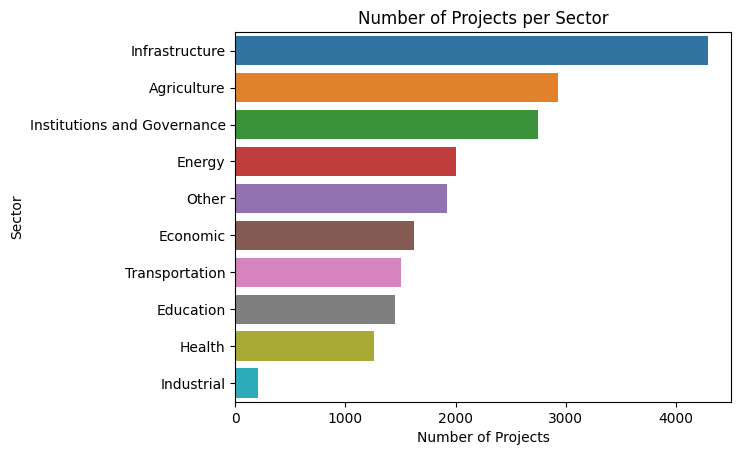

In [5]:
sector_plot = sns.barplot(x=sector_labels_values, y=sector_labels)
sector_plot.set(xlabel="Number of Projects", ylabel="Sector", title="Number of Projects per Sector")

In [7]:
# # Graphs each unique sector, and number of projects per sector
# plt.bar(sector_counts.keys(), sector_counts.values()

# plt.show()

## 2) # of projects per status
(e.g. active, closed, etc)

In [6]:
proj_status = projects["Project Status"].value_counts()

[Text(0.5, 1.0, 'Number of Projects per Status'),
 Text(0.5, 0, 'Project Status'),
 Text(0, 0.5, 'Number of Cases')]

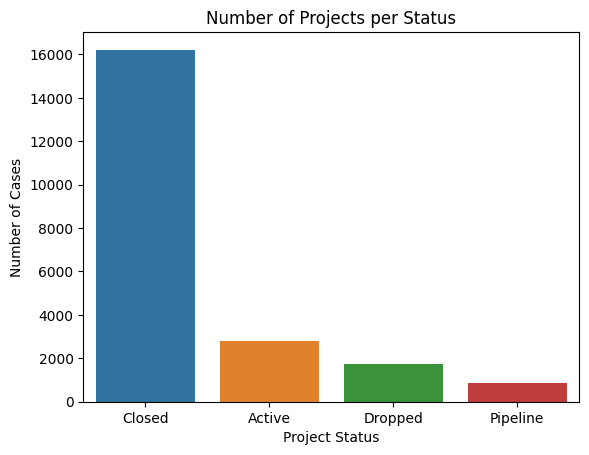

In [7]:
proj_status_plot = sns.barplot(x=proj_status.keys(), y=proj_status.values)
proj_status_plot.set(title="Number of Projects per Status", xlabel="Project Status", ylabel="Number of Cases")

## 3) Projects by Country

In [8]:
country = projects['Country'].value_counts()[:10].to_dict()

[Text(0.5, 1.0, 'Number of Projects per Country'),
 Text(0.5, 0, 'Number of Projects'),
 Text(0, 0.5, 'Country')]

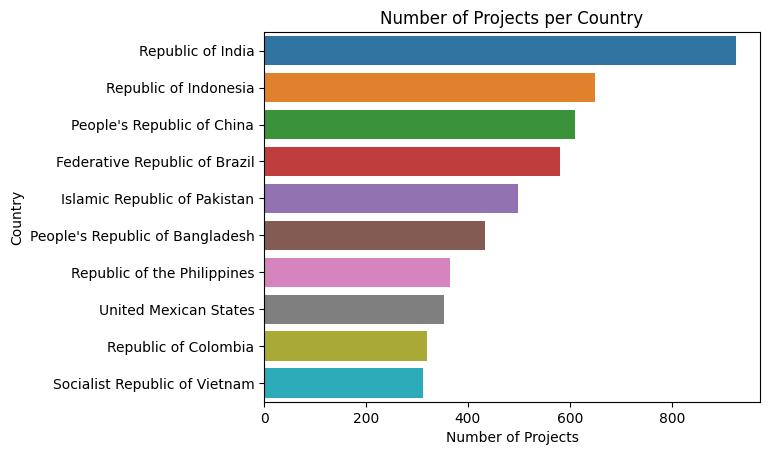

In [9]:
# Lists the top ten countries
country_plot = sns.barplot(x=list(country.values()), y=list(country.keys()))
country_plot.set(title="Number of Projects per Country", xlabel="Number of Projects", ylabel="Country")

## 4) Funding per Type

In [10]:
funding = {}
funding["Current Project Cost"] = np.sum(projects["Current Project Cost"])
funding["IBRD Commitment"] = np.sum(projects["IBRD Commitment"])
funding["IDA Commitment"] = np.sum(projects["IDA Commitment"])
funding["Grant Amount"] = np.sum(projects["Grant Amount"])
# funding["WB Funding"] = funding["Grant Amount"] + funding["IDA Commitment"] + funding["IBRD Commitment"]

[Text(0.5, 1.0, 'Funding Amount per Type'),
 Text(0.5, 0, 'Funding Amount (1e12)'),
 Text(0, 0.5, 'Funding Type')]

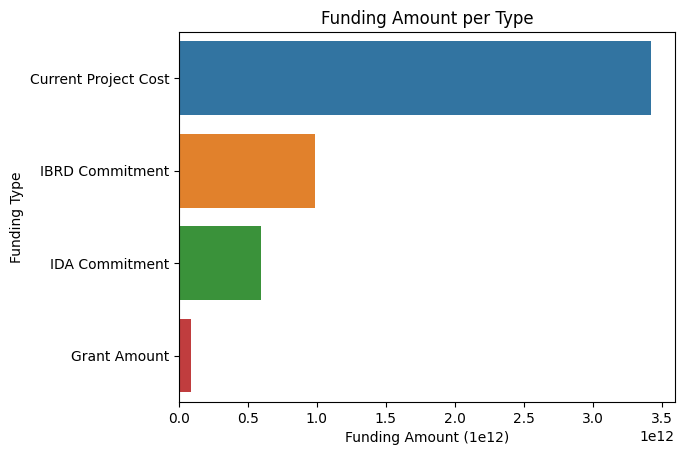

In [11]:
funding_plot = sns.barplot(x=list(funding.values()), y=list(funding.keys()))
funding_plot.set(title="Funding Amount per Type", xlabel="Funding Amount (1e12)", ylabel="Funding Type")

## 5) Funding per Country

In [12]:
country_funding = projects.groupby("Country").sum()

/var/folders/sn/wnvdnx4x1j32gd9gfk4ffw_r0000gn/T/ipykernel_36151/1697382707.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_funding = projects.groupby("Country").sum()


[Text(0.5, 1.0, 'Current Project Cost per Country'),
 Text(0.5, 0, 'Funding Amount (1e11)'),
 Text(0, 0.5, 'Country With Highest Current Project Cost')]

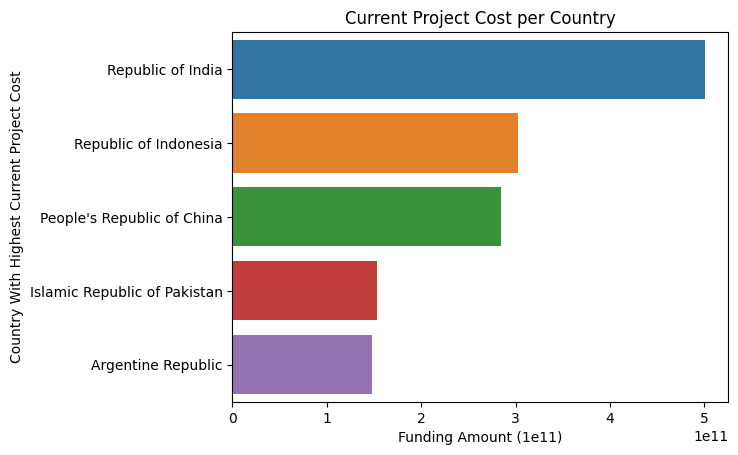

In [13]:
# Current Project Cost
curr_proj_fund = country_funding["Current Project Cost"].sort_values(ascending=False)[:5]
country_funding_plot = sns.barplot(x=list(curr_proj_fund.values), y=list(curr_proj_fund.keys()))
country_funding_plot.set(title="Current Project Cost per Country", xlabel="Funding Amount (1e11)", ylabel="Country With Highest Current Project Cost")

[Text(0.5, 1.0, 'IBRD Commitment per Country'),
 Text(0.5, 0, 'Funding Amount (1e11)'),
 Text(0, 0.5, 'Country With Highest IBRD Commitment')]

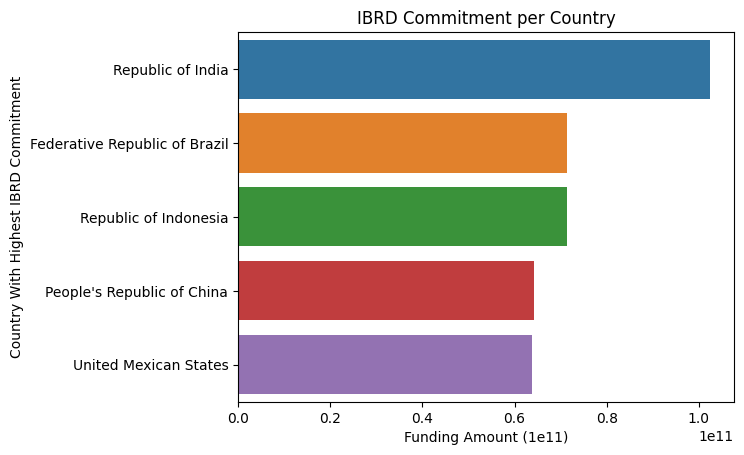

In [15]:
# IBRD Commitment
ibrd_commit = country_funding["IBRD Commitment"].sort_values(ascending=False)[:5]
ibrd_commit_plot = sns.barplot(x=list(ibrd_commit.values), y=list(ibrd_commit.keys()))
ibrd_commit_plot.set(title="IBRD Commitment per Country", xlabel="Funding Amount (1e11)", ylabel="Country With Highest IBRD Commitment")

[Text(0.5, 1.0, 'IDA Commitment per Country'),
 Text(0.5, 0, 'Funding Amount (1e10)'),
 Text(0, 0.5, 'Country With Highest IDA Commitment')]

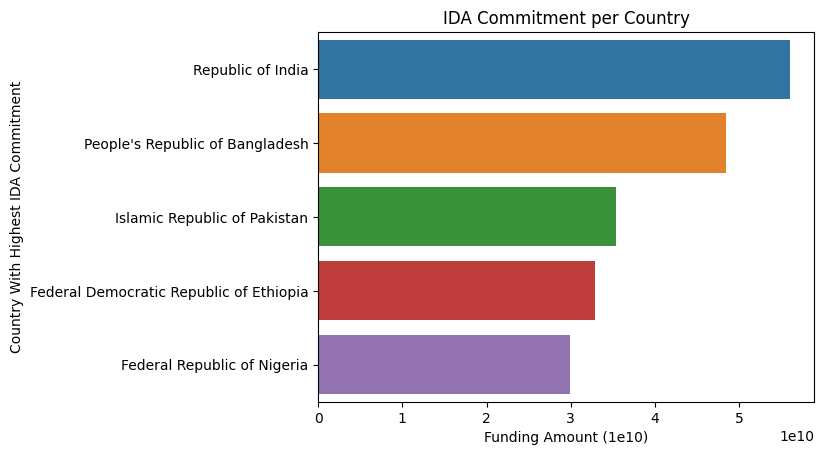

In [16]:
# IDA Commitment
ida_commit = country_funding["IDA Commitment"].sort_values(ascending=False)[:5]
ida_commit_plot = sns.barplot(x=list(ida_commit.values), y=list(ida_commit.keys()))
ida_commit_plot.set(title="IDA Commitment per Country", xlabel="Funding Amount (1e10)", ylabel="Country With Highest IDA Commitment")

[Text(0.5, 1.0, 'Grant Amount per Country'),
 Text(0.5, 0, 'Funding Amount (1e10)'),
 Text(0, 0.5, 'Country With Highest Grant Amount')]

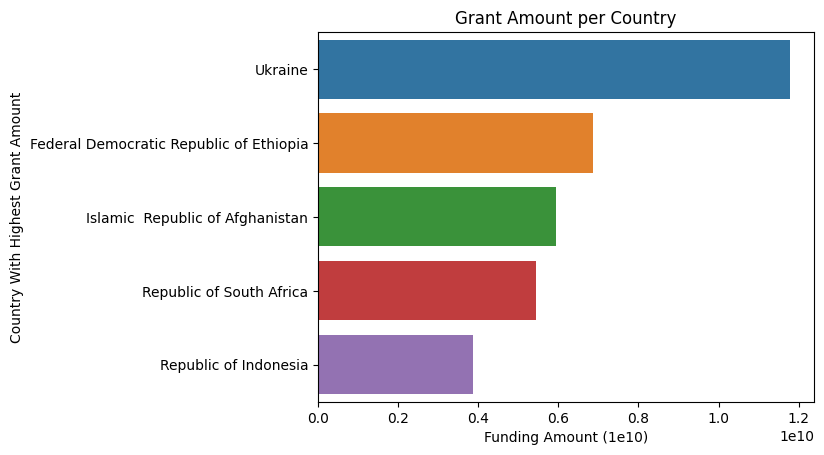

In [17]:
# Grant Amount
grant_amount = country_funding["Grant Amount"].sort_values(ascending=False)[:5]
grant_amount_plot = sns.barplot(x=list(grant_amount.values), y=list(grant_amount.keys()))
grant_amount_plot.set(title="Grant Amount per Country", xlabel="Funding Amount (1e10)", ylabel="Country With Highest Grant Amount")

In [18]:
print(len(projects["Implementing Agency"].unique()))

projects.groupby("Implementing Agency").sum()

4675


/var/folders/sn/wnvdnx4x1j32gd9gfk4ffw_r0000gn/T/ipykernel_36151/2589117414.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  projects.groupby("Implementing Agency").sum()


,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
Implementing Agency,,,,,
"(3) National Child Development Agency, MIGEPROF, (5) Ministry of Local Government (MINALOC), (1) Ministry of Finance and Economic Planning (MINECOFIN), (6) Ministry of Health, (4) Ministry of Education (MINEDUC), (2) Rwanda Social Security Board, MINECOFIN",150000000.0,0.0,150000000.0,150000000.0,0.0
"(3) National Child Development Agency, Ministry of Gender and Family Promotion (MIGEPROF), (5) Ministry of Local Government (MINALOC), (2) Rwanda Social Security Board (RSSB), (1) MINISTRY OF FINANCE AND ECONOMIC PLANNING (MINECOFIN), (4) Ministry of Education (MINEDUC), (6) Ministry of Health (MOH)",125000000.0,0.0,125000000.0,125000000.0,0.0
"(3) National Child Development Agency, Ministry of Gender and Family Promotion (MIGEPROF), (5) Ministry of Local Government (MINALOC), (2) Rwanda Social Security Board (RSSB), (1) Ministry of Finance and Economic Planning (MINECOFIN), (4) Ministry of Education (MINEDUC), (6) Ministry of Health (MOH)",175000000.0,0.0,175000000.0,175000000.0,0.0
*UKREXIMBANK - IBRD 80640,200000000.0,200000000.0,0.0,200000000.0,0.0
"-Ministry of Economy, planning and Regional Developpement",165000000.0,0.0,150000000.0,150000000.0,0.0
...,...,...,...,...,...
eGovernment Center,23000000.0,0.0,20000000.0,20000000.0,0.0
iHub,450000.0,0.0,0.0,0.0,450000.0
save The Children,2730000.0,0.0,0.0,0.0,0.0


## 6) Scatter plot of # of projects vs population

In [19]:
# Imports file containing country populations
path = os.path.join(os.getcwd(), "WorldPopulation.csv")

pop = pd.read_csv(path, index_col=1)
pop = pop.drop(["Rank", "pop2022", "Density", "area", "GrowthRate"], axis=1)

In [20]:
# Adds a column of alphaCodes
# If not found, saves value as "None"
projects["alphaCode"] = coco.convert(projects["Country"], to="ISO3", not_found="None")

Multi-Regional not found in regex
Caribbean not found in regex
Latin America not found in regex
Africa not found in regex
Western and Central Africa not found in regex
Western and Central Africa not found in regex
South Asia not found in regex
Organization of Eastern Caribbean States not found in regex
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
Western and Central Africa not found in regex
nan not found in ISO3
Democratic Socialist Republic of Sri Lan not found in regex
Western and Central Africa not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Western and Central Africa not found in regex
South Asia not found in regex
Latin America not found in regex
Danube Region Water Supply and Waste Pro not found in regex
nan not found in ISO3
World not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
World not found in regex
Western and Central Africa not foun

Latin America not found in regex
Africa not found in regex
Africa not found in regex
Western and Central Africa not found in regex
Western and Central Africa not found in regex
World not found in regex
Africa not found in regex
Western Balkans not found in regex
Western and Central Africa not found in regex
World not found in regex
Western and Central Africa not found in regex
Western and Central Africa not found in regex
Western and Central Africa not found in regex
Pacific Islands not found in regex
Western and Central Africa not found in regex
Western and Central Africa not found in regex
Western and Central Africa not found in regex
World not found in regex
Western and Central Africa not found in regex
Africa not found in regex
Western and Central Africa not found in regex
Western and Central Africa not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Europe and Central Asia not found in regex
World not found in regex
World not found in regex
Central Asia 

South Asia not found in regex
World not found in regex
Pacific Islands not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
World not found in regex
Europe and Central Asia not found in regex
Africa not found in regex
South Asia not found in regex
Europe and Central Asia not found in regex
Caribbean not found in regex
Caribbean not found in regex
Africa not found in regex
Africa not found in regex
Western and Central Africa not found in regex
Africa not found in regex
Western and Central Africa not found in regex
World not found in regex
Pacific Islands not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Western and Central Africa not found in regex
Middle East and North Africa not found in regex
Central America not found in regex
East Asia and Pacific not found in regex
South Asia not found in regex
Africa not found in regex
World not found in regex
Africa not found in regex
Central America not found in regex
Democratic Socialist Re

Africa not found in regex
Mercosur not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Middle East and North Africa not found in regex
Organization of Eastern Caribbean States not found in regex
Africa not found in regex
Africa not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
East Asia and Pacific not found in regex
World not found in regex
World not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Organization of Eastern Caribbean States not found in regex
Africa not found in regex
Western and Central Africa not found in regex
Organization of Eastern Caribbean States not found in regex
Africa not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Africa not found in regex
World not found in regex
Africa not found in regex
World not found in regex
East Asia and Pacific not found in regex
Africa not found in regex
Western and Central Afri

Socialist Federal Republic of Yugoslavia not found in regex
Africa not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Organization of Eastern Caribbean States not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Socialist Republic of Sri Lan not found in regex
Democratic Soc

Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia not found in regex
Socialist Federal Republic of Yugoslavia

In [21]:
# Length of countries with 3 digit code
print(len(projects[projects["alphaCode"]!="None"]))
# Length of countries without 3 digit code
print(len(projects[projects["alphaCode"]=="None"]))

20572
1108


In [22]:
# Adds a column of the simplified names, based on the alpha codes
projects["simplifiedCountryName"] = coco.convert(projects["alphaCode"], to="name_short", not_found="None")

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

In [23]:
# Confirms all 3-digit alpha codes have correlating country name (true)
print(len(projects[projects["simplifiedCountryName"]!="None"]))
print(len(projects[projects["simplifiedCountryName"]=="None"]))

20572
1108


In [24]:
# Finds the countries that do not have a population in the WB pop 2021 dataset
for country in projects["simplifiedCountryName"].drop_duplicates():
    if country not in pop.index:
        print(country)

None
Cote d'Ivoire
St. Lucia
Kyrgyz Republic
Türkiye
Congo Republic
Sint Maarten
Cabo Verde
Micronesia, Fed. Sts.
St. Vincent and the Grenadines
American Samoa
St. Kitts and Nevis


In [25]:
# Use below to find country name in pop df
# pop[["Kosovo" in s for s in pop.index]]

### NOT FOUND: 
# Sint Maarten

### NOTE:
# Kosovo population listed as NaN in 2021

In [26]:
# Manually correct names for names in pop2021
renameDict = {"Cote d'Ivoire": "Ivory Coast", "St. Lucia": "Saint Lucia", "Kyrgyz Republic": "Kyrgyzstan", 
             "Türkiye": "Turkey", "Congo Republic": "Republic of the Congo", "Cabo Verde": "Cape Verde",
              "Micronesia, Fed. Sts.": "Micronesia", 
              "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines", "American Samoa": "Samoa", 
              "St. Kitts and Nevis": "Saint Kitts and Nevis"
             }
projects = projects.replace({"simplifiedCountryName": renameDict})

In [27]:
projects = pd.merge(projects, pop, how = "left", left_on = "simplifiedCountryName", right_on = "name")

In [28]:
# Amount of projects with no population listed
len(projects[projects["pop2021"].isna()])

1199

In [29]:
# # Shows where pop info is missing
# projects[projects["pop2021"].isna()]["simplifiedCountryName"].drop_duplicates()

In [30]:
# Calculates which projects contain no pop info
print("No alpha code:         ", len(projects[projects["simplifiedCountryName"]=="None"]))
print("Sint Maarten Projects: ", len(projects[projects["simplifiedCountryName"]=="Sint Maarten"]))
print("Kosovo Projects:       ", len(projects[projects["simplifiedCountryName"]=="Kosovo"]))

No alpha code:          1108
Sint Maarten Projects:  21
Kosovo Projects:        70


In [31]:
# Calculates the number of projects per country
country_counts = projects["simplifiedCountryName"].value_counts()
country_counts = country_counts[country_counts.index!="None"]

In [32]:
pop["numProjects"] = country_counts
pop = pop.sort_values("numProjects", ascending=False)
pop = pop.reset_index()

In [130]:
test = pop[:10]

In [131]:
test

,name,pop2021,numProjects
0,India,1407563.842,927.0
1,Indonesia,273753.191,650.0
2,China,1425893.465,610.0
3,Brazil,214326.223,580.0
4,Pakistan,231402.117,499.0
5,Bangladesh,169356.251,433.0
6,Philippines,113880.328,364.0
7,Mexico,126705.138,353.0
8,Colombia,51516.562,319.0
9,Vietnam,97468.029,311.0


In [42]:
def scatter_text(x, y, text_column, data, title, xlabel, ylabel):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""

    # Create the scatter plot
    p1 = sns.scatterplot(data=data,x=x, y=y, legend=False)
    
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='left', 
                 size='medium', color='black', weight='semibold')
    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return p1

<AxesSubplot: title={'center': 'Number of World Bank Projects vs Population'}, xlabel='Population (2021)', ylabel='Number of World Bank Projects'>

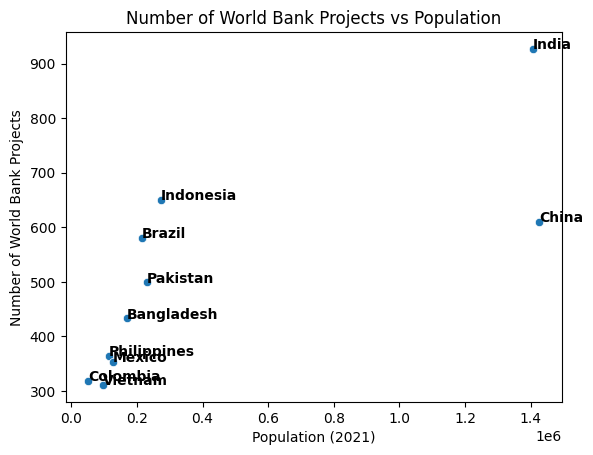

In [109]:
scatter_text("pop2021", "numProjects", "name",
             data = test.reset_index(), 
             title = 'Number of World Bank Projects vs Population',
             xlabel = "Population (2021)",
             ylabel = "Number of World Bank Projects")

## 7) Scatterplot of Population vs total funding in country 

In [46]:
invest = projects.groupby("simplifiedCountryName").sum()[["Total IDA and IBRD Commitment"]].reset_index()
invest = invest[invest["simplifiedCountryName"]!="None"]
invest.loc[invest["simplifiedCountryName"]=="Türkiye", "simplifiedCountryName"] = "Turkey"

/var/folders/sn/wnvdnx4x1j32gd9gfk4ffw_r0000gn/T/ipykernel_36151/1491298682.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  invest = projects.groupby("simplifiedCountryName").sum()[["Total IDA and IBRD Commitment"]].reset_index()


In [161]:
temp = invest.sort_values("Total IDA and IBRD Commitment", ascending=False)[:10]
temp = temp.merge(pop, how="left", left_on = "simplifiedCountryName", right_on="name")[["name", "pop2021", "Total IDA and IBRD Commitment"]]

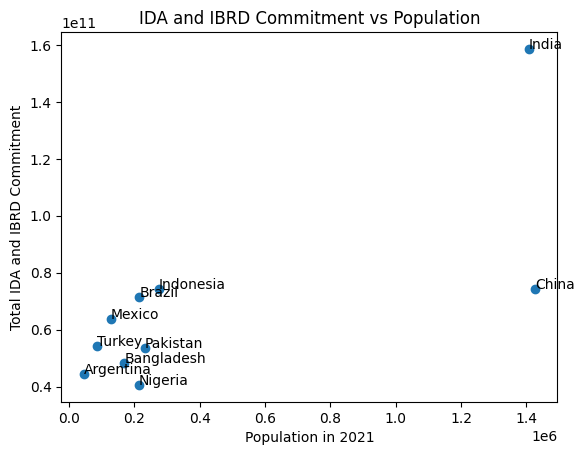

In [167]:
# create scatter plot
plt.scatter(temp['pop2021'], temp['Total IDA and IBRD Commitment'])

# add labels and title
plt.xlabel('Population in 2021')
plt.ylabel('Total IDA and IBRD Commitment')
plt.title('IDA and IBRD Commitment vs Population')

# label points with names
for i, name in enumerate(temp['name']):
    plt.annotate(name, (temp['pop2021'][i], temp['Total IDA and IBRD Commitment'][i]))

# show plot
plt.show()

## 8) Infra Quality vs Country

In [34]:
infra = pd.read_csv("Statista Infrastructure Index.csv", header=[2])

In [42]:
temp = infra.sort_values("Infrastructure Quality Index", ascending=True)[:11]

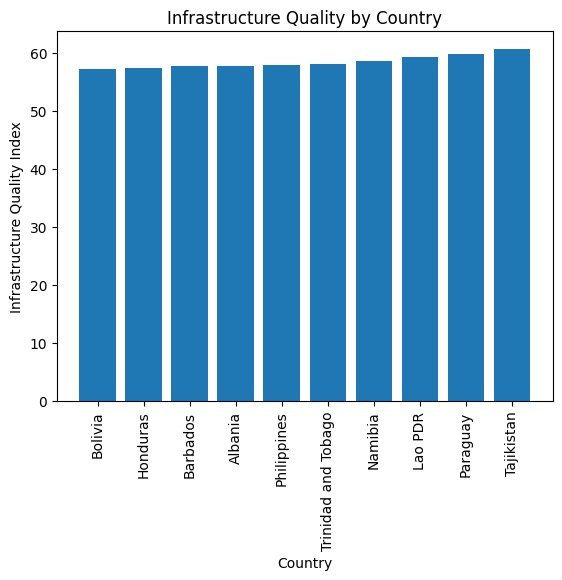

In [36]:
# create bar plot
plt.bar(temp['Country'], temp['Infrastructure Quality Index'])

# add labels and title
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Infrastructure Quality Index')
plt.title('Infrastructure Quality by Country')

# show plot
plt.show()

In [37]:
countries_most_invested = ["India", "Indonesia", "China", "Brazil", "Mexico", "Turkey", "Pakistan", "Bangladesh", "Argentina", "Nigeria"]
temp = infra[infra["Country"].isin(countries_most_invested)].sort_values("Infrastructure Quality Index")

In [38]:
infra[infra["Country"]=="Pakistan"]

,Country,Infrastructure Quality Index


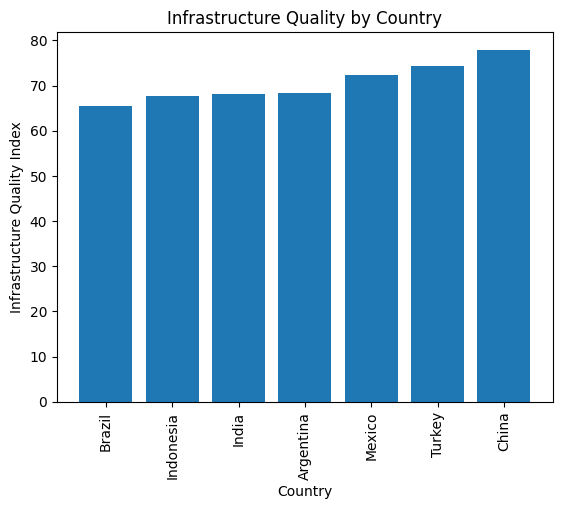

In [39]:
# create bar plot
plt.bar(temp['Country'], temp['Infrastructure Quality Index'])

# add labels and title
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Infrastructure Quality Index')
plt.title('Infrastructure Quality by Country')

# show plot
plt.show()

In [71]:
df_merge = invest.merge(infra, how = "right", left_on = "simplifiedCountryName", right_on = "Country")
new = df_merge[df_merge["Total IDA and IBRD Commitment"].notna()]

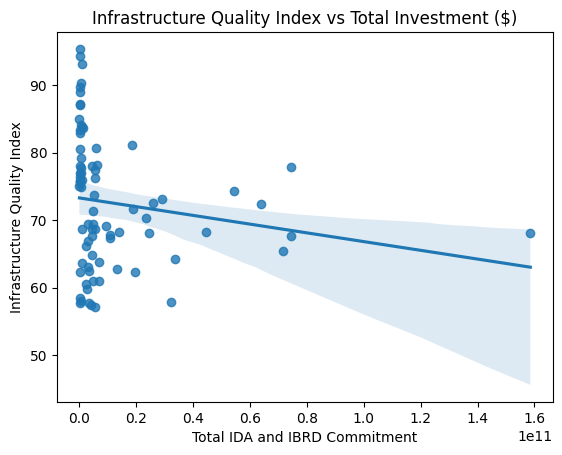

R-squared value: 0.03


In [84]:
sns.regplot(x='Total IDA and IBRD Commitment', y='Infrastructure Quality Index', data=new)

# set the plot title
plt.title('Infrastructure Quality Index vs Total Investment ($)')

# show the plot
plt.show()

# calculate the R-squared value
corr = new['Total IDA and IBRD Commitment'].corr(new['Infrastructure Quality Index'])**2
print(f'R-squared value: {corr:.2f}')

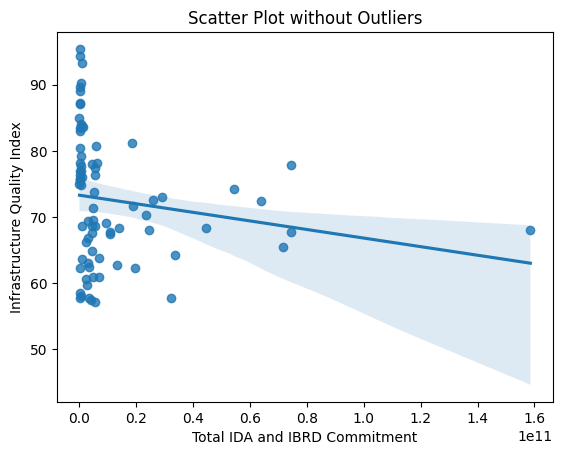

R-squared value: 0.03


In [82]:
# calculate the 1.5 IQR range for the "Infrastructure Quality Index" column
Q1 = new['Infrastructure Quality Index'].quantile(0.25)
Q3 = new['Infrastructure Quality Index'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter the data to exclude outliers
filtered_data = new[new['Infrastructure Quality Index'] <= 60000000]

# create the scatter plot with a linear regression line
sns.regplot(x='Total IDA and IBRD Commitment', y='Infrastructure Quality Index', data=filtered_data)

# set the plot title
plt.title('Scatter Plot without Outliers')

# show the plot
plt.show()

# calculate the R-squared value
corr = filtered_data['Total IDA and IBRD Commitment'].corr(filtered_data['Infrastructure Quality Index'])**2
print(f'R-squared value: {corr:.2f}')

In [95]:
# select the top ten countries by investment
top_ten = new.nlargest(15, 'Total IDA and IBRD Commitment')

# select the relevant columns using loc
top_ten_table = top_ten.loc[:, ['simplifiedCountryName', 'Total IDA and IBRD Commitment']]

# set the index to the simplifiedCountryName column
top_ten_table.set_index('simplifiedCountryName', inplace=True)

# print the table
print(top_ten_table)

                       Total IDA and IBRD Commitment
simplifiedCountryName                               
India                                   1.585614e+11
Indonesia                               7.439019e+10
China                                   7.422990e+10
Brazil                                  7.143511e+10
Mexico                                  6.372094e+10
Turkey                                  5.421188e+10
Argentina                               4.456545e+10
Colombia                                3.354248e+10
Philippines                             3.227130e+10
Egypt                                   2.904779e+10
Morocco                                 2.586158e+10
South Africa                            2.431660e+10
Ukraine                                 2.346035e+10
Peru                                    1.955036e+10
Romania                                 1.881441e+10


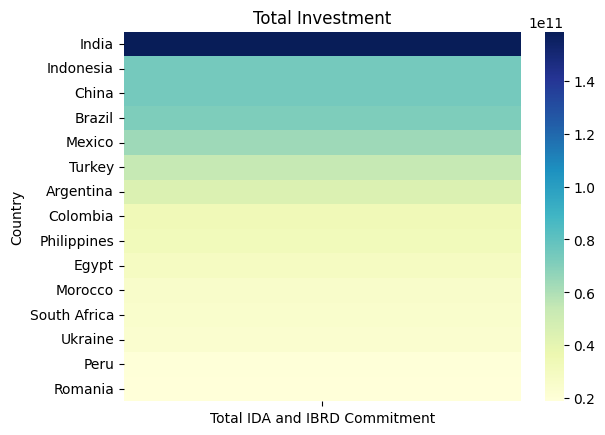

In [99]:
# load the data from the 'new' dataframe
df = new[['simplifiedCountryName', 'Total IDA and IBRD Commitment']].set_index('simplifiedCountryName')

# create a heatmap of the values
sns.heatmap(top_ten_table, cmap='YlGnBu')

# set the plot title
plt.title('Total Investment')
plt.ylabel("Country")

# show the plot
plt.show()